In [8]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_excel('/content/MLR_DATA_B_to_A.xlsx')

In [9]:
X = df.drop('Value',axis = 1)
y = df['Value']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
df

,Direction,Value,Max Velocity,R_category,CL_category
0,0,0.210926,62.671,1,4
1,0,0.228736,64.824,1,4
2,0,0.330678,65.718,1,4
3,0,0.094481,54.369,1,4
4,0,0.140833,59.458,1,4
...,...,...,...,...,...
985,0,0.015535,76.101,1,4
986,0,0.020898,63.705,1,4
987,0,0.028131,68.625,1,4
988,0,0.050563,67.347,1,4


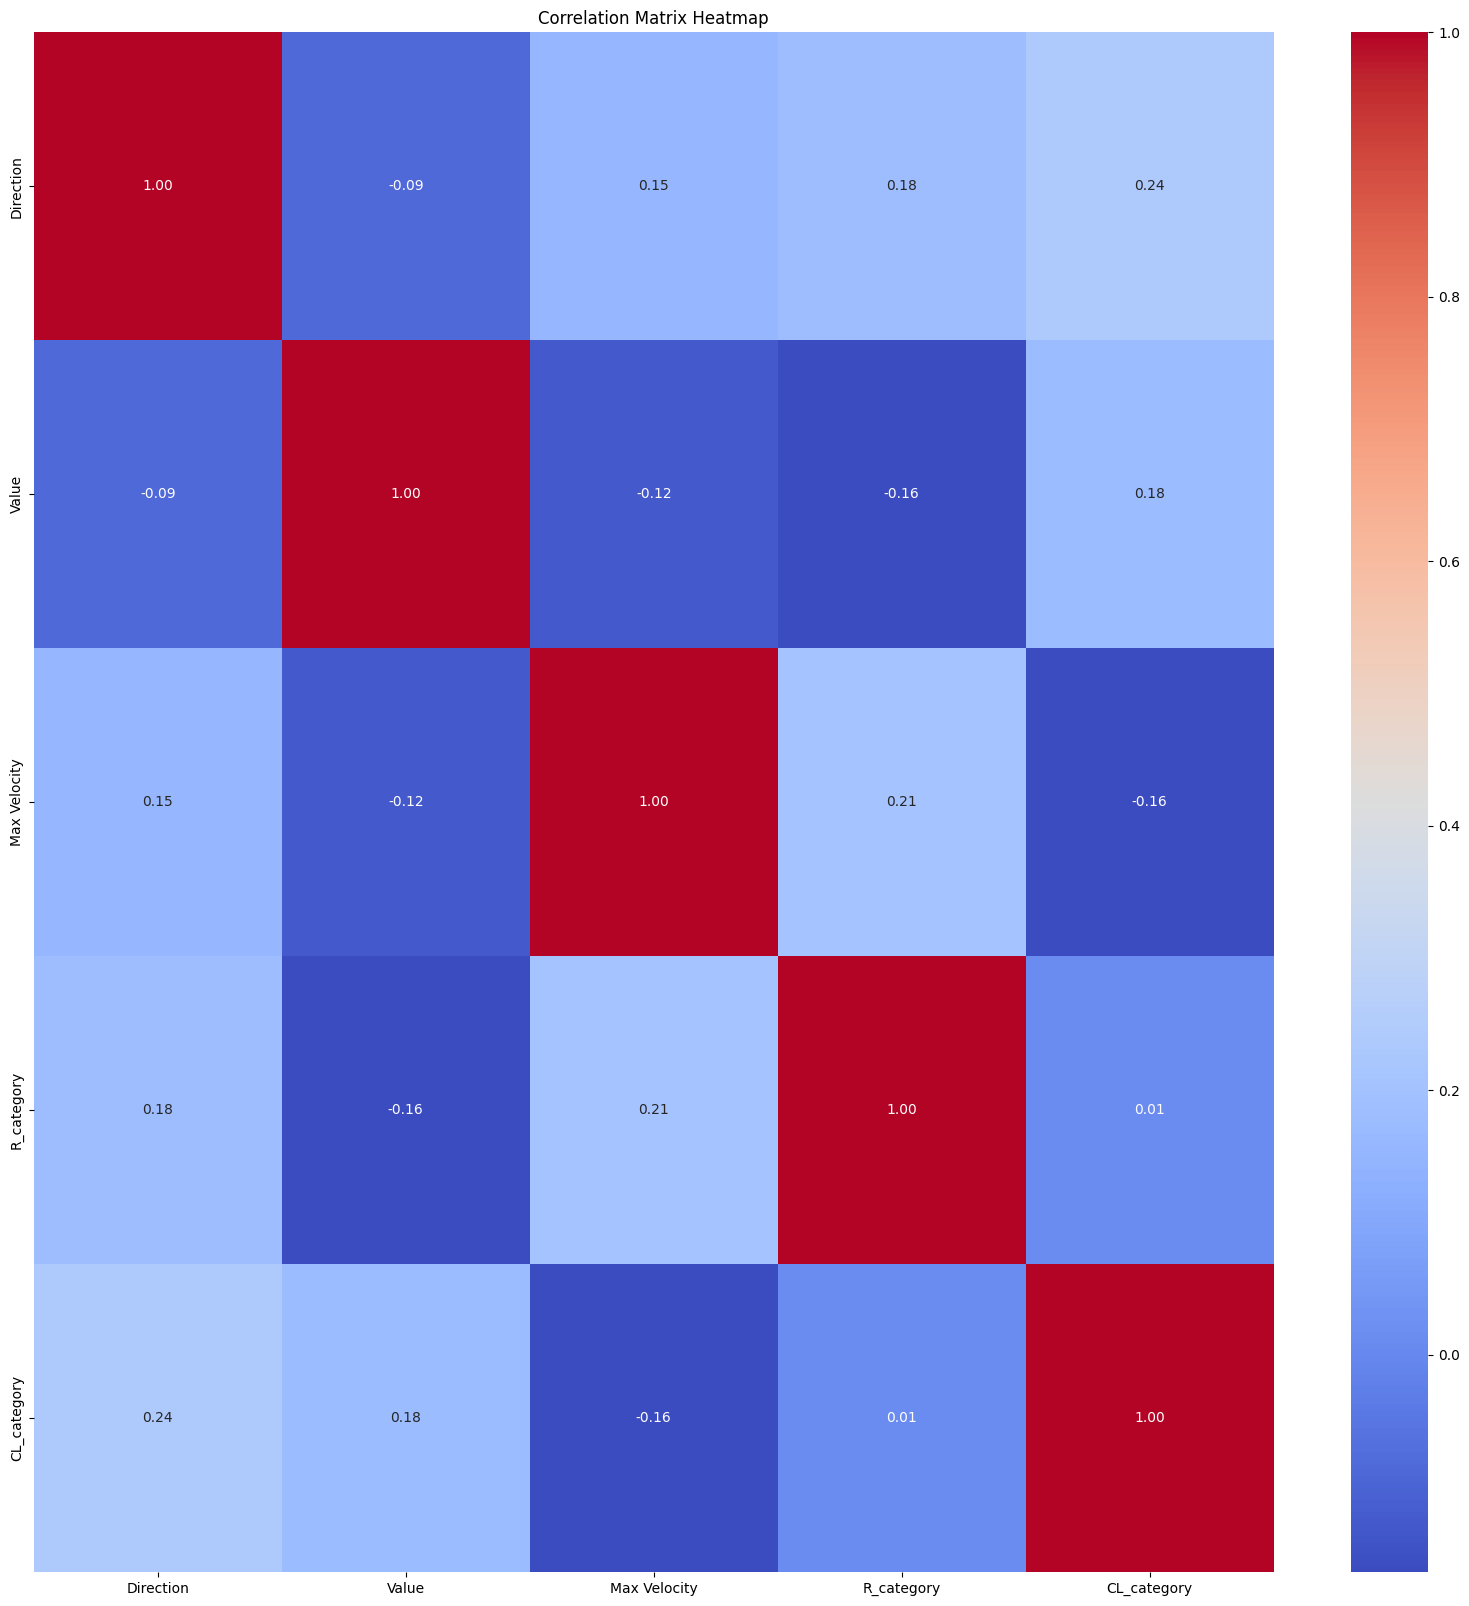

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

In [13]:
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')

# Display the coefficients
print(f'Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')

Mean Squared Error: 0.01
R^2 Score: 0.03
Coefficients: [-0.01964371 -0.00041011 -0.02823774  0.02828908]
Intercept: 0.09524884625542412


In [14]:
model = LinearRegression()
model.fit(X_train, y_train)
from sklearn.preprocessing import PolynomialFeatures

# Predict and calculate R² score
y_pred = model.predict(X_test)
print(f'R² score: {r2_score(y_test, y_pred)}')

# If R² score is low, try polynomial features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=42)

model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train_poly)

y_pred_poly = model_poly.predict(X_test_poly)
print(f'R² score with polynomial features: {r2_score(y_test_poly, y_pred_poly)}')

R² score: 0.02734449661734073
R² score with polynomial features: 0.1812776615981574
